In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

In [2]:
billboard = pd.read_csv('kcmillersean-billboard-hot-100-1958-2017/original/Hot Stuff.csv')
billboard

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1963-0...,6/1/1963,11,Still,Bill Anderson,StillBill Anderson,1.0,17.0,11.0,8.0
1,http://www.billboard.com/charts/hot-100/1967-0...,1/7/1967,11,Coming Home Soldier,Bobby Vinton,Coming Home SoldierBobby Vinton,1.0,17.0,11.0,8.0
2,http://www.billboard.com/charts/hot-100/1971-0...,7/3/1971,11,She's Not Just Another Woman,The 8th Day,She's Not Just Another WomanThe 8th Day,1.0,17.0,11.0,8.0
3,http://www.billboard.com/charts/hot-100/1975-1...,11/29/1975,11,Saturday Night,Bay City Rollers,Saturday NightBay City Rollers,1.0,17.0,11.0,8.0
4,http://www.billboard.com/charts/hot-100/1979-0...,9/29/1979,11,Pop Muzik,M,Pop MuzikM,1.0,17.0,11.0,8.0
...,...,...,...,...,...,...,...,...,...,...
325690,https://www.billboard.com/charts/hot-100/2018-...,3/17/2018,38,You Make It Easy,Jason Aldean,You Make It EasyJason Aldean,1.0,38.0,28.0,6.0
325691,https://www.billboard.com/charts/hot-100/2018-...,3/24/2018,34,You Make It Easy,Jason Aldean,You Make It EasyJason Aldean,1.0,38.0,28.0,7.0
325692,https://www.billboard.com/charts/hot-100/2018-...,3/31/2018,36,You Make It Easy,Jason Aldean,You Make It EasyJason Aldean,1.0,34.0,28.0,8.0
325693,https://www.billboard.com/charts/hot-100/2018-...,4/7/2018,34,You Make It Easy,Jason Aldean,You Make It EasyJason Aldean,1.0,36.0,28.0,9.0


## Checking if all weeks do contain 100 hits

In [3]:
counts = billboard.groupby('WeekID').count()['url']
counts[counts != 100]

WeekID
11/16/1991    99
11/23/1991    99
11/30/1991    99
12/14/1991    99
12/7/1991     99
Name: url, dtype: int64

--> It seems like there are 5 weeks in 1991 where there are 99 hits instead of 100. 

## Taking the top 10

In [4]:
top_ten = billboard[billboard['Week Position'] <= 10]

In [5]:
# Making sure that there are 10 songs for each week 
top_ten_counts = top_ten.groupby('WeekID').count()['Week Position']
top_ten_counts[top_ten_counts != 10]

Series([], Name: Week Position, dtype: int64)

--> For every week, we have 10 distinct top songs. 

In [6]:
# Counting the number of different ranks 
ranks = top_ten.groupby('WeekID').nunique()['Week Position']
ranks[ranks != 10]

WeekID
8/16/1958    9
8/23/1958    9
8/9/1958     9
Name: Week Position, dtype: int64

In [7]:
top_ten[top_ten['WeekID'] == '8/16/1958'].sort_values(by='Week Position')

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
27151,http://www.billboard.com/charts/hot-100/1958-0...,8/16/1958,1,Nel Blu Dipinto Di Blu (Volaré),Domenico Modugno,Nel Blu Dipinto Di Blu (Volaré)Domenico Modugno,1.0,2.0,1.0,3.0
27179,http://www.billboard.com/charts/hot-100/1958-0...,8/16/1958,2,Little Star,The Elegants,Little StarThe Elegants,1.0,14.0,2.0,3.0
27186,http://www.billboard.com/charts/hot-100/1958-0...,8/16/1958,3,My True Love,Jack Scott,My True LoveJack Scott,1.0,6.0,3.0,3.0
227997,http://www.billboard.com/charts/hot-100/1958-0...,8/16/1958,4,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1.0,1.0,1.0,3.0
27220,http://www.billboard.com/charts/hot-100/1958-0...,8/16/1958,5,Just A Dream,Jimmy Clanton And His Rockets,Just A DreamJimmy Clanton And His Rockets,1.0,9.0,5.0,3.0
228007,http://www.billboard.com/charts/hot-100/1958-0...,8/16/1958,5,Patricia,Perez Prado And His Orchestra,PatriciaPerez Prado And His Orchestra,1.0,3.0,2.0,3.0
294975,http://www.billboard.com/charts/hot-100/1958-0...,8/16/1958,7,When,Kalin Twins,WhenKalin Twins,1.0,5.0,5.0,3.0
228053,http://www.billboard.com/charts/hot-100/1958-0...,8/16/1958,8,Rebel-'rouser,Duane Eddy His Twangy Guitar And The Rebels,Rebel-'rouserDuane Eddy His Twangy Guitar And ...,1.0,8.0,6.0,3.0
27277,http://www.billboard.com/charts/hot-100/1958-0...,8/16/1958,9,Fever,Peggy Lee,FeverPeggy Lee,1.0,13.0,9.0,3.0
228089,http://www.billboard.com/charts/hot-100/1958-0...,8/16/1958,10,Splish Splash,Bobby Darin,Splish SplashBobby Darin,1.0,4.0,3.0,3.0


--> For 3 weeks in August '58, two hits had the same 'Week Position' (for example, in the week 8/16/1958, 'Just A Dream' and 'Patricia' both had rank 5).

## Adding the audio features to the data

In [8]:
audio_feats = pd.read_excel('kcmillersean-billboard-hot-100-1958-2017/original/Hot 100 Audio Features.xlsx')
audio_feats

,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_album,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,"AdictoTainy, Anuel AA & Ozuna","Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],3jbT1Y5MoPwEIpZndDDwVq,NaN,Adicto (with Anuel AA & Ozuna),0.0,270740.0,91.0,...,10.0,-4.803,0.0,0.0735,0.017000,0.000016,0.1790,0.623,80.002,4.0
1,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ShallowLady Gaga & Bradley Cooper,Lady Gaga & Bradley Cooper,Shallow,"['dance pop', 'pop']",2VxeLyX666F8uXCJ0dZF8B,NaN,A Star Is Born Soundtrack,0.0,215733.0,88.0,...,7.0,-6.362,1.0,0.0308,0.371000,0.000000,0.2310,0.323,95.799,4.0
3,EnemiesPost Malone Featuring DaBaby,Post Malone Featuring DaBaby,Enemies,"['dfw rap', 'melodic rap', 'rap']",0Xek5rqai2jcOWCYWJfVCF,NaN,Hollywood's Bleeding,1.0,196760.0,86.0,...,6.0,-4.169,1.0,0.2100,0.058800,0.000000,0.0955,0.667,76.388,4.0
4,"Bacc At It AgainYella Beezy, Gucci Mane & Quavo","Yella Beezy, Gucci Mane & Quavo",Bacc At It Again,"['dfw rap', 'rap', 'southern hip hop', 'trap']",2biNa12dMbHJrHVFRt8JyO,https://p.scdn.co/mp3-preview/fa6fa6f6f363be29...,Bacc At It Again,1.0,228185.0,61.0,...,8.0,-5.725,0.0,0.1680,0.001240,0.000001,0.0716,0.856,135.979,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28487,"Tonight, TonightThe Smashing Pumpkins",The Smashing Pumpkins,"Tonight, Tonight","['alternative metal', 'alternative rock', 'gru...",7bu0znpSbTks0O6I98ij0W,NaN,Mellon Collie And The Infinite Sadness (Deluxe...,0.0,254626.0,69.0,...,6.0,-9.381,1.0,0.0368,0.000063,0.748000,0.2370,0.222,148.928,4.0
28488,Tonight's The Night (Gonna Be Alright)Rod Stewart,Rod Stewart,Tonight's The Night (Gonna Be Alright),"['adult standards', 'mellow gold', 'soft rock']",10LRRKPmx8uHcSxLVWK0ct,https://p.scdn.co/mp3-preview/de4772519fbe8134...,A Night on the Town (Deluxe Edition),0.0,237120.0,55.0,...,11.0,-12.617,1.0,0.0523,0.336000,0.125000,0.3820,0.724,136.542,3.0
28489,Tonight's The NightBLACKstreet,BLACKstreet,Tonight's The Night,"['boy band', 'dance pop', 'hip hop', 'hip pop'...",3scEwKiAkfdPUdZ6k1AEoW,NaN,Blackstreet,0.0,258026.0,32.0,...,6.0,-5.561,0.0,0.0759,0.133000,0.000011,0.1730,0.591,76.060,4.0
28490,Tonight's The NightS.S.O.,S.S.O.,Tonight's The Night,[],5Gxa3zKb3xoS9G0y4fJnP1,https://p.scdn.co/mp3-preview/fb63477c965b182b...,Funky Chicken: Belgian Grooves From The 70's,0.0,170506.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Genre

In [80]:
audio_genre = top_ten.merge(right=audio_feats, how='inner', on=['SongID'])[["spotify_genre","WeekID"]]
audio_genre['WeekID'] = (pd.to_datetime(audio_genre['WeekID']).dt.year//10)*10
audio_genre.spotify_genre = audio_genre.spotify_genre.apply(lambda x : str(x).strip('][').split(', '))
audio_genre = audio_genre.explode("spotify_genre").groupby("WeekID")["spotify_genre"].value_counts().to_frame('counts')

In [81]:
top_decade = audio_genre.groupby('WeekID').head(3).reset_index().astype({"WeekID": object})
top_decade

,WeekID,spotify_genre,counts
0,1950,'rock-and-roll',367
1,1950,'brill building pop',320
2,1950,'adult standards',275
3,1960,'brill building pop',2477
4,1960,'adult standards',1793
5,1960,'bubblegum pop',1564
6,1970,'soft rock',2189
7,1970,'mellow gold',2153
8,1970,'adult standards',1505
9,1980,'soft rock',2709


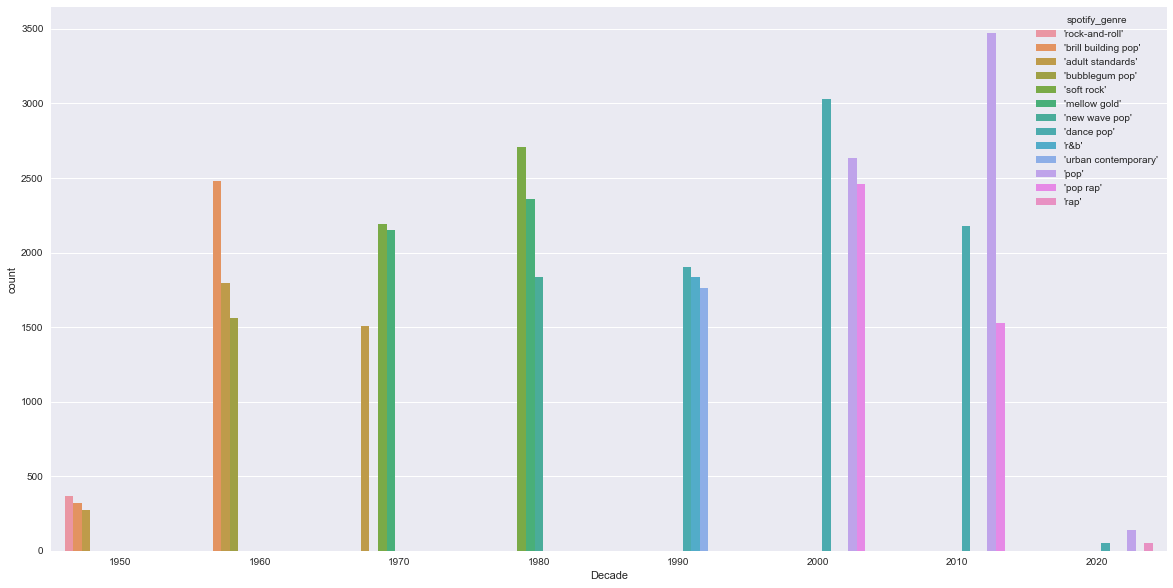

In [82]:
import seaborn as sns
pyplot.figure(figsize=(20,10))
pyplot.style.use("seaborn")
sns.barplot(x="WeekID", y="counts", hue="spotify_genre", data=top_decade)
pyplot.xlabel("Decade")
pyplot.ylabel("count")
pyplot.show()

### Merging the datasets

In [9]:
len(set(top_ten['SongID']))

4949

In [10]:
len(set(billboard['SongID']))

29154

**There are a few songs on the billboard that are not present in the Hot 100 Audio Features dataset --> need to scrape them from Spotify API**

(29154 songs in billboard vs 28492 songs in audio features).

In [11]:
# Drop useless columns (in general, spotify related info)
# light_audio = audio_feats.drop(columns=['spotify_track_id', 'spotify_track_preview_url',\
#                                         'spotify_track_album', 'spotify_track_popularity'])
# merged = top_ten.merge(right=light_audio, how='left', on=['SongID'], indicator=True)
# merged[merged['_merge'] != 'both']

(The next cells ignores the songs that are not present in the Hot 100 Audio features dataset)

In [12]:
# Drop useless columns (in general, spotify related info)
light_audio = audio_feats.drop(columns=['spotify_track_id', 'spotify_track_preview_url',\
                                        'spotify_track_album', 'spotify_track_popularity'])
merged = top_ten.merge(right=light_audio, how='inner', on=['SongID'])
merged.sort_values(by=['WeekID','Week Position']).tail(20)

,url,WeekID,Week Position,Song_x,Performer_x,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
24177,http://www.billboard.com/charts/hot-100/2000-0...,9/9/2000,10,(Hot S**t) Country Grammar,Nelly,(Hot S**t) Country GrammarNelly,1.0,11.0,10.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7229,http://www.billboard.com/charts/hot-100/2006-0...,9/9/2006,1,SexyBack,Justin Timberlake,SexyBackJustin Timberlake,1.0,31.0,1.0,8.0,...,7.0,-5.562,0.0,0.0789,0.05840,0.000000,0.0519,0.964,117.000,4.0
1768,http://www.billboard.com/charts/hot-100/2006-0...,9/9/2006,2,London Bridge,Fergie,London BridgeFergie,1.0,1.0,1.0,6.0,...,1.0,-5.832,1.0,0.3810,0.21400,0.000000,0.2040,0.610,90.889,4.0
15846,http://www.billboard.com/charts/hot-100/2006-0...,9/9/2006,3,(When You Gonna) Give It Up To Me,Sean Paul Featuring Keyshia Cole,(When You Gonna) Give It Up To MeSean Paul Fea...,1.0,4.0,3.0,14.0,...,8.0,-3.040,1.0,0.2250,0.06700,0.000000,0.0410,0.718,95.824,4.0
8635,http://www.billboard.com/charts/hot-100/2006-0...,9/9/2006,4,Crazy,Gnarls Barkley,CrazyGnarls Barkley,1.0,2.0,2.0,17.0,...,8.0,-1.609,1.0,0.0339,0.01720,0.057700,0.0826,0.612,111.963,4.0
11267,http://www.billboard.com/charts/hot-100/2006-0...,9/9/2006,5,Buttons,The Pussycat Dolls Featuring Snoop Dogg,ButtonsThe Pussycat Dolls Featuring Snoop Dogg,1.0,5.0,4.0,16.0,...,2.0,-4.318,1.0,0.3200,0.15800,0.000000,0.2680,0.434,210.750,4.0
7212,http://www.billboard.com/charts/hot-100/2006-0...,9/9/2006,6,Promiscuous,Nelly Furtado Featuring Timbaland,PromiscuousNelly Furtado Featuring Timbaland,1.0,3.0,1.0,17.0,...,10.0,-6.078,0.0,0.0476,0.05000,0.000028,0.1470,0.842,114.316,4.0
21140,http://www.billboard.com/charts/hot-100/2006-0...,9/9/2006,7,Me & U,Cassie,Me & UCassie,1.0,6.0,3.0,20.0,...,8.0,-4.802,0.0,0.0294,0.35200,0.000000,0.0655,0.739,99.990,4.0
21944,http://www.billboard.com/charts/hot-100/2006-0...,9/9/2006,8,Show Stopper,Danity Kane,Show StopperDanity Kane,1.0,17.0,8.0,2.0,...,5.0,-10.330,0.0,0.1870,0.01330,0.000000,0.3300,0.465,76.034,4.0
11608,http://www.billboard.com/charts/hot-100/2006-0...,9/9/2006,9,Sexy Love,Ne-Yo,Sexy LoveNe-Yo,1.0,9.0,9.0,12.0,...,8.0,-6.417,1.0,0.0433,0.26500,0.000473,0.0596,0.580,93.984,4.0


In [13]:
merged['WeekID'] = pd.to_datetime(merged['WeekID'])

In [14]:
merged.columns

Index(['url', 'WeekID', 'Week Position', 'Song_x', 'Performer_x', 'SongID',
       'Instance', 'Previous Week Position', 'Peak Position', 'Weeks on Chart',
       'Performer_y', 'Song_y', 'spotify_genre', 'spotify_track_explicit',
       'spotify_track_duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

### Computing the average audio features per week & visualizing their evolution

BTW: Discuss whether mean or median

In [35]:
merged_avg_week = merged.groupby('WeekID').mean()
merged_avg_week

,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart,spotify_track_explicit,spotify_track_duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
WeekID,,,,,,,,,,,,,,,,,,,
1/1/1966,5.500000,1.000000,5.600000,4.000000,8.400000,0.000000,164689.100000,0.497900,0.538000,4.800000,-10.294200,0.900000,0.052070,0.449650,0.000014,0.156070,0.650800,131.639600,3.800000
1/1/1972,5.500000,1.000000,6.100000,4.900000,8.700000,0.000000,212948.125000,0.600750,0.483750,4.875000,-12.345500,0.750000,0.062025,0.525625,0.114820,0.127312,0.660500,118.411750,4.000000
1/1/1977,5.500000,1.000000,5.500000,5.400000,12.100000,0.000000,245927.700000,0.586600,0.562500,7.200000,-10.342200,0.500000,0.052950,0.327099,0.016527,0.131370,0.662600,121.658500,3.800000
1/1/1983,5.500000,1.000000,5.500000,4.200000,14.300000,0.000000,251525.800000,0.606000,0.643100,6.300000,-9.612000,0.600000,0.046690,0.168490,0.007043,0.113510,0.735900,125.103100,4.000000
1/1/1994,5.500000,1.000000,5.500000,4.000000,11.100000,0.250000,271602.500000,0.706375,0.587000,4.250000,-7.979625,0.875000,0.078188,0.254288,0.000900,0.187100,0.511625,108.985875,3.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/9/1989,5.777778,1.000000,6.777778,4.888889,9.888889,0.000000,254351.875000,0.598500,0.513875,5.000000,-10.550750,0.750000,0.032438,0.288538,0.001173,0.122288,0.419000,124.192500,4.000000
9/9/1995,5.500000,1.000000,5.700000,4.200000,11.900000,0.000000,273210.857143,0.611571,0.569000,7.571429,-8.663429,0.571429,0.089057,0.345157,0.000026,0.161443,0.409571,125.089286,3.857143
9/9/2000,5.500000,1.000000,6.100000,4.000000,17.500000,0.222222,255546.333333,0.715556,0.710667,6.222222,-6.167000,0.222222,0.059789,0.096332,0.010165,0.183978,0.624778,106.096222,4.000000


The interesting numerical features to plot are: 
* spotify_track_duration
* danceability
* energy
* key ?
* loudness
* speechiness
* acousticness
* instrumentalness
* liveness
* valence
* tempo
* time signature

In [15]:
sns.set()

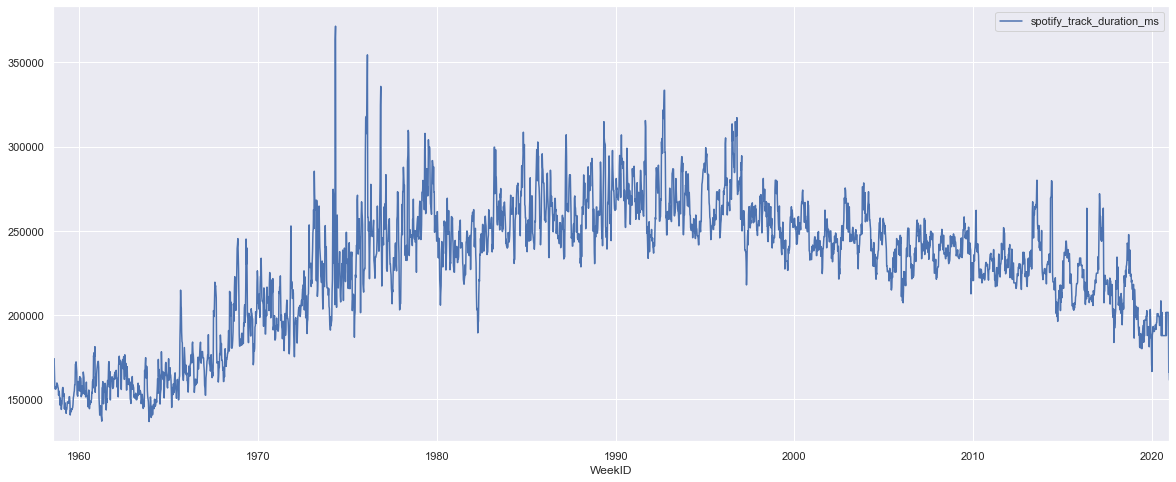

In [16]:
merged_avg_week.plot(y='spotify_track_duration_ms', figsize=(20, 8), use_index=True);

<AxesSubplot:xlabel='WeekID', ylabel='speechiness'>

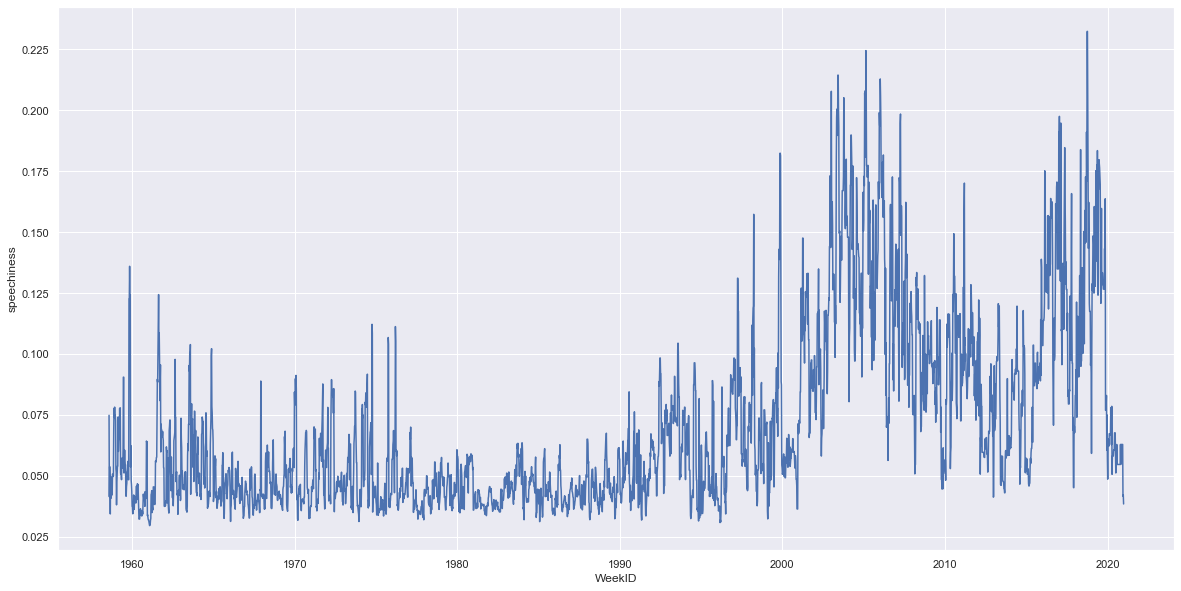

In [17]:
fig, ax = pyplot.subplots(figsize=(20,10))
sns.lineplot(ax=ax, data=merged_avg_week, x=merged_avg_week.index, y="speechiness", ci=None)

IDEA: For this plot, we actually should compute the mean for the top 100 and not for the top 10, to get a more general idea 

### Trying to plot one point per month

In [18]:
# The following added column contains only the month and the year info for each row
merged['month_year'] = pd.to_datetime(merged['WeekID']).dt.to_period('M')

In [19]:
merged_avg_month = merged.groupby('month_year').mean()
merged_avg_month

,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart,spotify_track_explicit,spotify_track_duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
month_year,,,,,,,,,,,,,,,,,,,
1958-08,5.676471,1.00,9.392857,5.058824,3.176471,0.0,163911.406250,0.628143,0.394054,6.285714,-12.946679,1.000000,0.049293,0.557664,0.051207,0.295471,0.642893,96.008964,3.678571
1958-09,5.500000,1.00,7.131579,4.815789,7.184211,0.0,156496.368421,0.567882,0.434088,6.676471,-11.496294,0.970588,0.045253,0.574441,0.048838,0.186435,0.728147,118.465882,3.676471
1958-10,5.500000,1.00,6.375000,4.400000,9.600000,0.0,158550.055556,0.559265,0.444118,6.264706,-12.086676,0.970588,0.047515,0.592618,0.051640,0.191324,0.715941,124.803412,3.735294
1958-11,5.500000,1.00,6.320000,4.340000,9.560000,0.0,154879.354167,0.501021,0.483500,5.812500,-11.026271,0.895833,0.064621,0.683688,0.072490,0.197808,0.612104,117.946938,3.750000
1958-12,5.500000,1.05,6.450000,4.075000,9.125000,0.0,148930.625000,0.503950,0.449400,5.800000,-10.856000,0.825000,0.075070,0.810975,0.118111,0.210825,0.596225,118.414975,3.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08,4.700000,NaN,NaN,NaN,NaN,0.0,187786.500000,0.530500,0.806000,0.500000,-4.142000,1.000000,0.054700,0.061735,0.000105,0.214400,0.451000,133.203500,4.000000
2020-09,5.875000,NaN,NaN,NaN,NaN,0.0,187786.500000,0.530500,0.806000,0.500000,-4.142000,1.000000,0.054700,0.061735,0.000105,0.214400,0.451000,133.203500,4.000000
2020-10,6.625000,NaN,NaN,NaN,NaN,0.0,191233.125000,0.526125,0.803500,0.625000,-4.125250,1.000000,0.056750,0.046669,0.000131,0.184250,0.424500,142.656875,4.000000


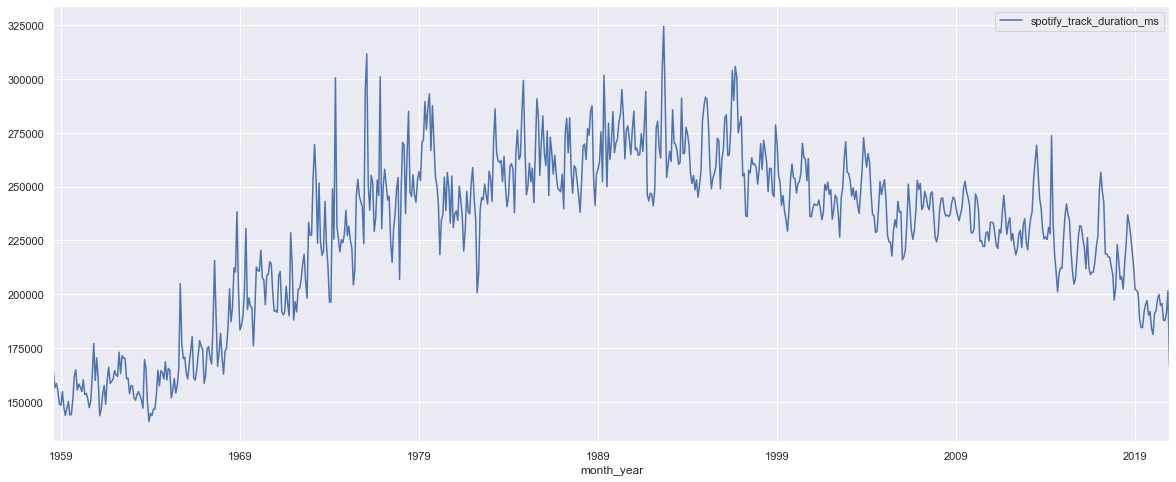

In [20]:
merged_avg_month.plot(y=['spotify_track_duration_ms'], figsize=(20, 8), use_index=True);

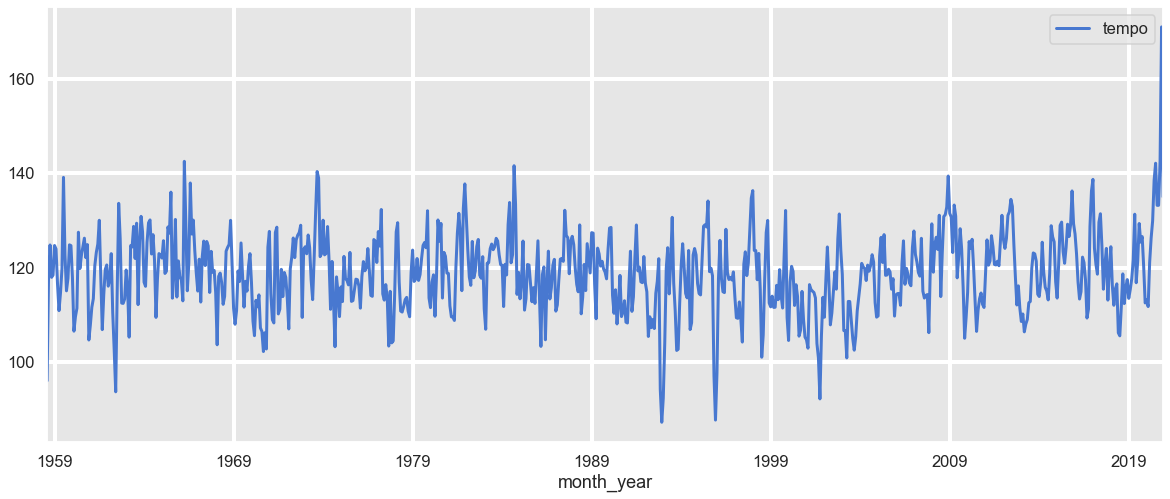

In [37]:
merged_avg_month.plot(y=['tempo'], figsize=(20, 8), use_index=True);

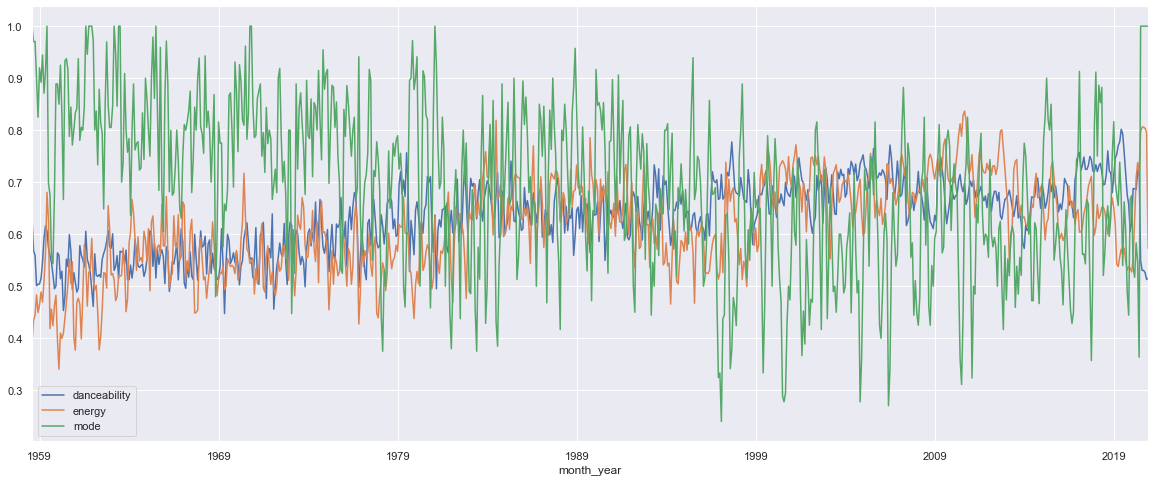

In [21]:
merged_avg_month.plot(y=['danceability', 'energy', 'mode'], figsize=(20, 8), use_index=True);

### Trying to plot one point per year

In [22]:
# The following added column contains only the year info for each row
merged['year'] = pd.to_datetime(merged['WeekID']).dt.to_period('Y')

In [23]:
merged_avg_year = merged.groupby('year').mean()
merged_avg_year

,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart,spotify_track_explicit,spotify_track_duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
year,,,,,,,,,,,,,,,,,,,
1958,5.529703,1.009901,6.954082,4.509901,7.960396,0.000000,156140.530928,0.544120,0.446068,6.125000,-11.564288,0.923913,0.057820,0.655166,0.070946,0.212200,0.653967,116.073147,3.722826
1959,5.523438,1.023438,6.876953,4.429688,9.093750,0.000000,151289.127610,0.544608,0.497603,4.856148,-10.717153,0.795824,0.062399,0.678615,0.068878,0.188523,0.671740,121.276910,3.723898
1960,5.500000,1.018868,6.654717,4.307547,9.045283,0.000000,157657.787472,0.532787,0.442756,4.906040,-10.749850,0.843400,0.039983,0.694481,0.075905,0.200620,0.651280,117.433427,3.709172
1961,5.506823,1.027290,7.093567,4.555556,8.690058,0.000000,157094.991266,0.536218,0.496000,4.617904,-10.193472,0.897380,0.058024,0.628265,0.087083,0.239515,0.678891,118.012740,3.792576
1962,5.500000,1.034615,6.805769,4.434615,8.925000,0.000000,164054.106430,0.545614,0.501084,5.434590,-9.829705,0.829268,0.050664,0.622552,0.059721,0.212739,0.675231,114.922361,3.842572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,5.596916,1.158590,6.038202,4.171806,16.002203,0.268065,218302.927739,0.674781,0.631786,6.319347,-6.151625,0.543124,0.133121,0.156946,0.006034,0.162087,0.510117,120.054685,3.983683
2017,5.722101,1.177243,6.881696,4.050328,15.829322,0.424318,222738.694789,0.734730,0.648052,5.394541,-5.667414,0.625310,0.116510,0.132433,0.005148,0.126306,0.561615,123.167583,3.970223
2018,5.599258,1.196660,6.648703,3.849722,13.541744,0.634470,219121.191288,0.717513,0.638197,5.477273,-5.867068,0.708333,0.128628,0.161869,0.001743,0.197027,0.444144,114.315949,3.964015


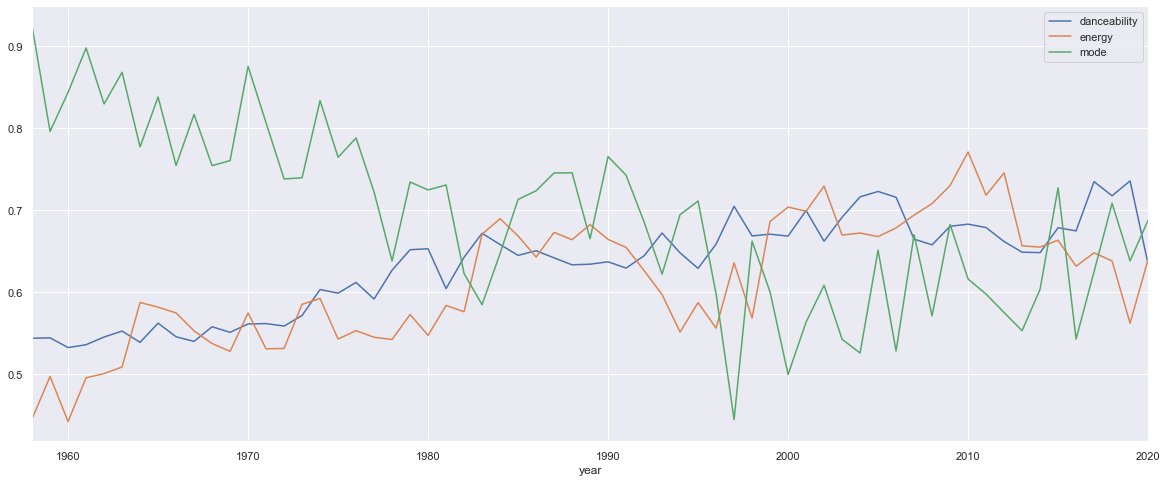

In [24]:
merged_avg_year.plot(y=['danceability', 'energy', 'mode'], figsize=(20, 8), use_index=True);

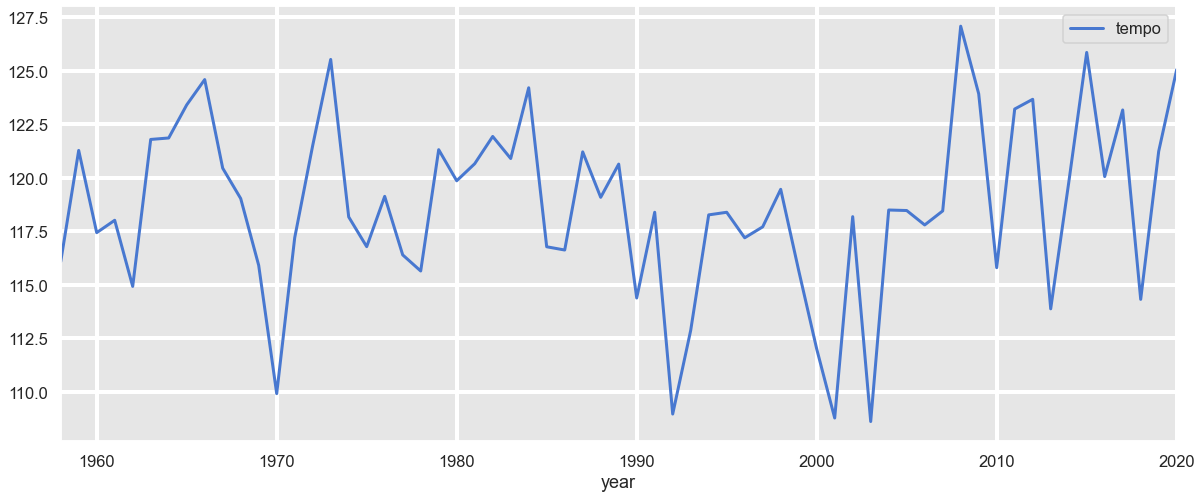

In [38]:
merged_avg_year.plot(y=['tempo'], figsize=(20, 8), use_index=True);

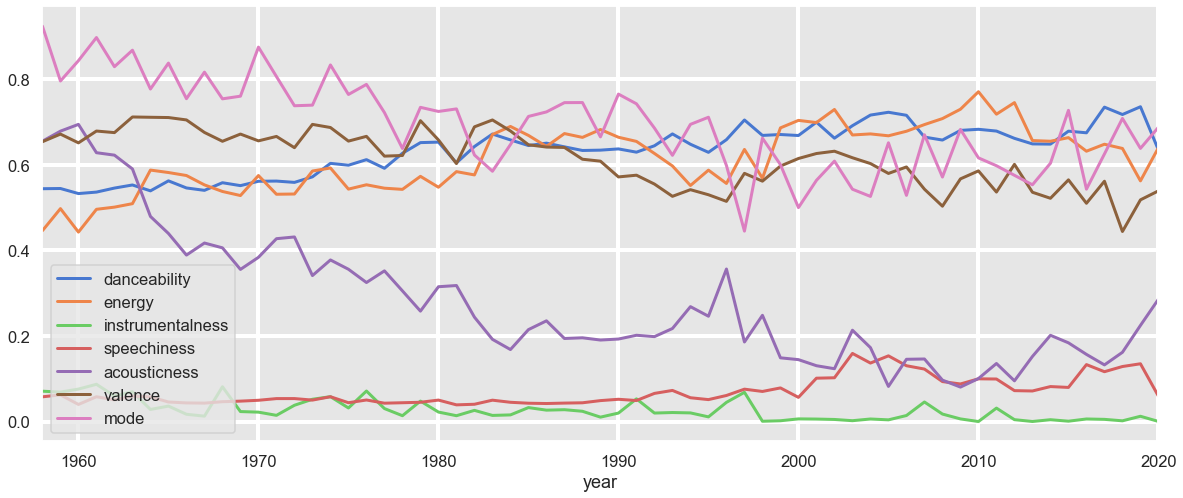

In [25]:
# sns.set_style("ticks")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 3, "grid.linewidth": 4})
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_palette("muted")
merged_avg_year.plot(y=['danceability', 'energy', 'instrumentalness', 'speechiness', 'acousticness','valence','mode'],\
                     figsize=(20, 8), use_index=True);

### Same but with all 100 songs per week 

In [40]:
# Drop useless columns (in general, spotify related info)
merged_100 = billboard.merge(right=light_audio, how='inner', on=['SongID'])
merged_100['WeekID'] = pd.to_datetime(merged_100['WeekID'])

In [41]:
# The following added column contains only the year info for each row
merged_100['year'] = pd.to_datetime(merged_100['WeekID']).dt.to_period('Y')
merged_100['month_year'] = pd.to_datetime(merged['WeekID']).dt.to_period('M')

In [42]:
merged_100_avg_year = merged_100.groupby('year').mean()
merged_100_avg_month = merged_100.groupby('month_year').mean()

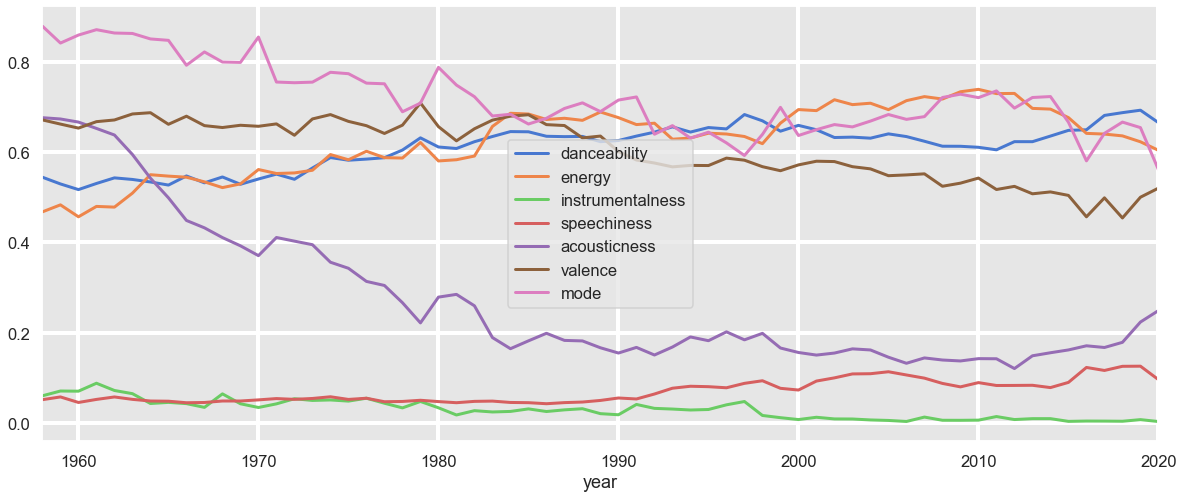

In [43]:
# sns.set_style("ticks")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 3, "grid.linewidth": 4})
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_palette("muted")
merged_100_avg_year.plot(y=['danceability', 'energy', 'instrumentalness', 'speechiness', 'acousticness','valence','mode'],\
                     figsize=(20, 8), use_index=True);

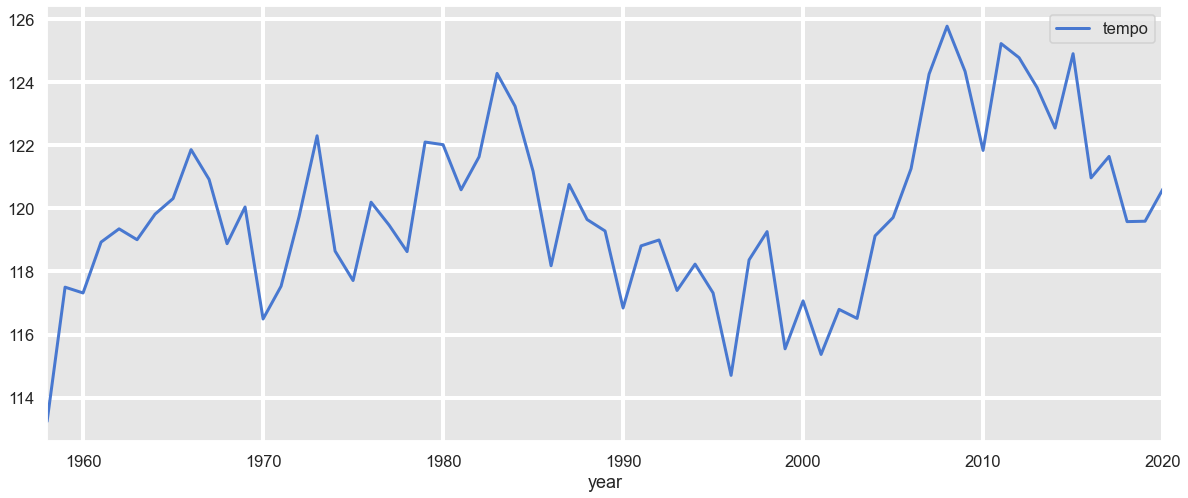

In [44]:
merged_100_avg_year.plot(y=['tempo'], figsize=(20, 8), use_index=True);

**--> Smoother !**